In [87]:
# Setup Project

!git clone https://github.com/gunturrs/asian-fisheries-trade-analysis-granite.git

%cd asian-fisheries-trade-analysis-granite

!ls data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Cloning into 'asian-fisheries-trade-analysis-granite'...
remote: Enumerating objects: 34, done.
remote: Counting objects: 100% (34/34), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 34 (delta 10), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (34/34), 32.15 KiB | 4.59 MiB/s, done.
Resolving deltas: 100% (10/10), done.
/content/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite/asian-fisheries-trade-analysis-granite
Asia_Quantity.xls


In [82]:
# Load Dataset
df = pd.read_excel("data/Asia_Quantity.xls")

# 1. Lihat 5 baris pertama
#df.head()

# 2. Info struktur data
#df.info()

# 3. Statistik deskriptif
#df.describe()

# 4. Cek kolom yang ada
#print("Dataset Column: ", df.columns.tolist())

# 5. Cek jumlah missing values
#print("Missing values per column:", df.isnull().sum())

In [86]:
# Data Cleaning

# Hapus data di S_2000-S_2015
df = df.drop(columns=[c for c in df.columns.map(str) if c.startswith("S_")])

# Reshape Data
df_long = df.melt(
    id_vars = ["Land Area", "Trade flow", "Commodity"],
    var_name = "Year",
    value_name = "Quantity"
)

df_long["Year"] = df_long["Year"].astype(int)
df_long.head()


,Land Area,Trade flow,Commodity,Year,Quantity
0,Afghanistan,Import,Fish,2000,0
1,Armenia,Export,Crustaceans,2000,20
2,Armenia,Export,Fish,2000,11
3,Armenia,Import,Crustaceans,2000,4
4,Armenia,Import,Fish,2000,799


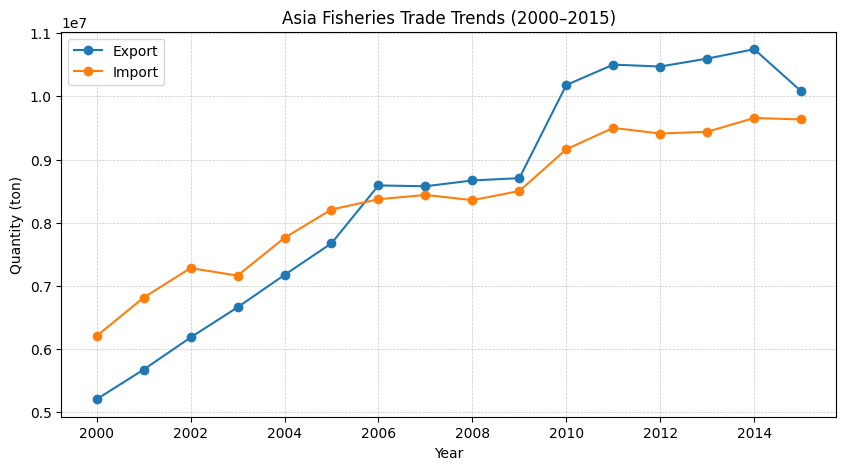

In [118]:
# Asia Trade Trends (2000-2015)

trend = df_long.groupby(['Year','Trade flow'])['Quantity'].sum().reset_index()

plt.figure(figsize=(10,5))
for flow in trend['Trade flow'].unique():
    subset = trend[trend['Trade flow']==flow]
    plt.plot(subset['Year'], subset['Quantity'], marker='o', label=flow)

plt.title("Asia Fisheries Trade Trends (2000–2015)")
plt.xlabel("Year")
plt.ylabel("Quantity (ton)")
plt.legend()
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()


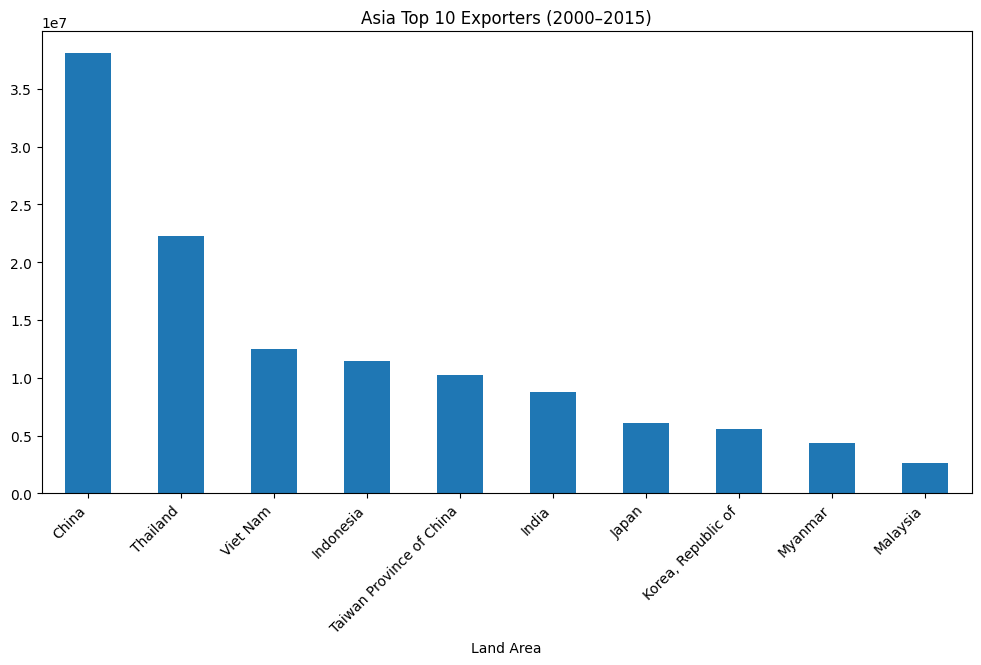

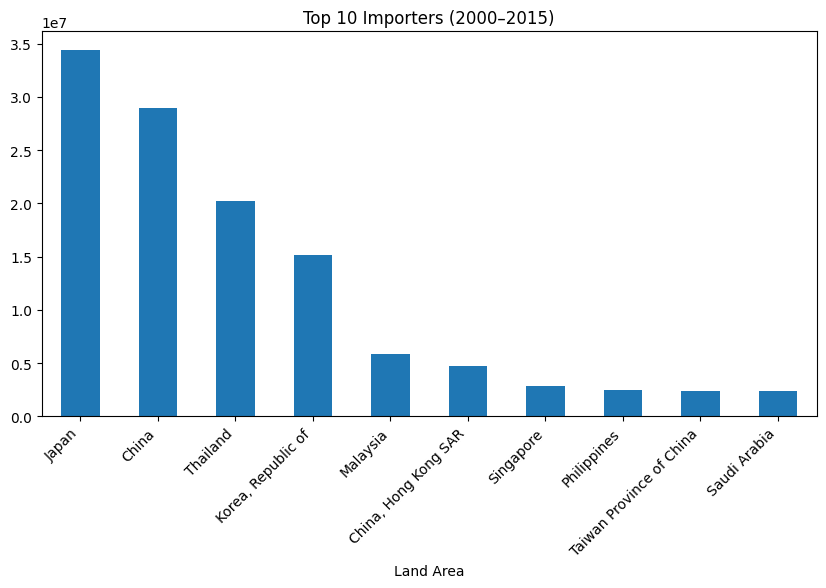

In [125]:
# Asia Top 10 Exporters (2000-2015)

top_exporter = df_long[df_long['Trade flow']=='Export'] \
    .groupby('Land Area')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
top_exporter.plot(kind='bar', title="Asia Top 10 Exporters (2000–2015)")
plt.xticks(rotation=45, ha='right')
plt.show()

# Asia Top 10 Importers (2000-2015)

top_importer = df_long[df_long['Trade flow']=='Import'] \
    .groupby('Land Area')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
top_importer.plot(kind='bar', title="Top 10 Importers (2000–2015)")
plt.xticks(rotation=45, ha='right')
plt.show()


In [112]:
# Commodity Share

commodity_share_quantity = df_long.groupby('Commodity')['Quantity'].sum()
commodity_share_quantity


,Quantity
Commodity,
Crustaceans,39071169
Fish,230526972


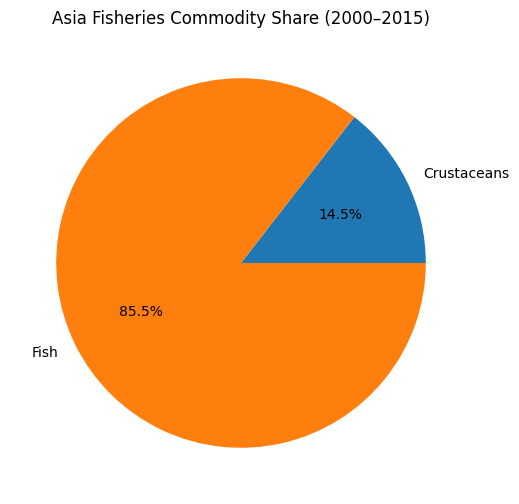

In [113]:
# Asia Fisheries Commodity Share (2000-2015)

commodity_share_quantity.plot(
    kind='pie',
    autopct='%1.1f%%',
    figsize=(6,6),
    title="Asia Fisheries Commodity Share (2000–2015)"
)
plt.ylabel("")  # biar label Y hilang
plt.show()

In [93]:
# Net Exporters and Importers in Asia over the years

net_trade = df_long.groupby(['Land Area','Trade flow'])['Quantity'].sum().unstack()
net_trade['Balance'] = net_trade['Export'] - net_trade['Import']
net_trade.sort_values('Balance', ascending=False).head(10)   # top net exporters
net_trade.sort_values('Balance').head(10)                    # top net importers

Trade flow,Export,Import,Balance
Land Area,,,
Viet Nam,12484716.0,1727369.0,10757347.0
Indonesia,11479900.0,1589613.0,9890287.0
China,38044558.0,28966907.0,9077651.0
India,8734113.0,210387.0,8523726.0
Taiwan Province of China,10231341.0,2377442.0,7853899.0
Myanmar,4373785.0,62577.0,4311208.0
Thailand,22257422.0,20251050.0,2006372.0
Pakistan,1845083.0,32578.0,1812505.0
Yemen,1155418.0,149573.0,1005845.0


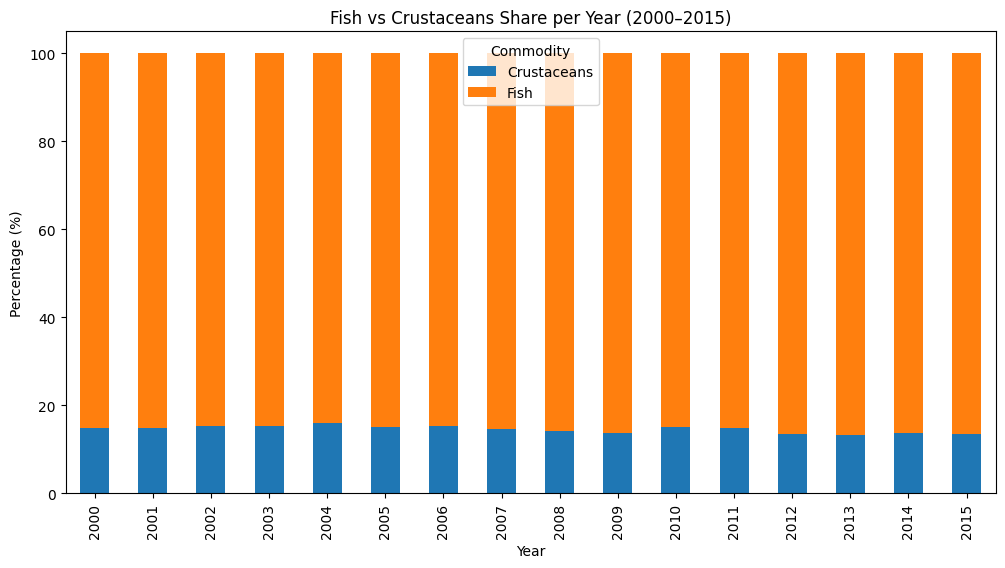

In [104]:
# Quantity Agrega
per_year_share = df_long.groupby(['Year','Commodity'])['Quantity'].sum().unstack()

# Ubah ke persentase (%)
per_year_share = per_year_share.div(per_year_share.sum(axis=1), axis=0) * 100

# Plot bar chart stacked
per_year_share.plot(
    kind='bar',
    stacked=True,
    figsize=(12,6),
    title="Fish vs Crustaceans Share per Year (2000–2015)"
)

plt.ylabel("Percentage (%)")
plt.xlabel("Year")
plt.legend(title="Commodity")
plt.show()